In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [4]:
df= pd.read_csv('loanpredict.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isnull().sum().sort_values()

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

<AxesSubplot:>

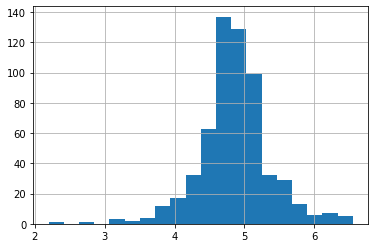

In [9]:
df['loanAmount_log'] = np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

In [10]:
df.isnull().sum().sort_values()

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
loanAmount_log       22
Self_Employed        32
Credit_History       50
dtype: int64

<AxesSubplot:>

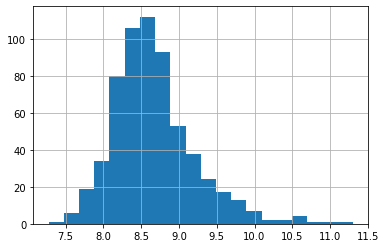

In [11]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [12]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [13]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [14]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [15]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [16]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log = df.loanAmount_log.fillna(df.loanAmount_log.mean())

In [17]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [19]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [36]:
X = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

In [37]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [38]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [39]:
print("per of missing gender is ",df['Gender'].isnull().sum()/df.shape[0]*100 )

per of missing gender is  0.0


In [40]:
print("number of people take group by gender:" )
print(df['Gender'].value_counts())

number of people take group by gender:
Male      502
Female    112
Name: Gender, dtype: int64


In [41]:
print("number of people take group by marital status:" )
print(df['Married'].value_counts())

number of people take group by marital status:
Yes    401
No     213
Name: Married, dtype: int64


In [42]:
print("number of people take group by dependence:" )
print(df['Dependents'].value_counts())

number of people take group by dependence:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [43]:
print("number of people take group by self employed:" )
print(df['Self_Employed'].value_counts())

number of people take group by self employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


In [44]:
print("number of people take group by loan amount:" )
print(df['LoanAmount'].value_counts())

number of people take group by loan amount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


In [45]:
print("number of people take group by credit history:" )
print(df['Credit_History'].value_counts())

number of people take group by credit history:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [48]:
for i in range(5):
    X_train[:,i] = LabelEncoder_x.fit_transform(X_train[:,i])
    X_train[:,7] = LabelEncoder_x.fit_transform(X_train[:,7])
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [75]:
LabelEncoder_y = LabelEncoder()
y_train = LabelEncoder_x.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [76]:
LabelEncoder_y = LabelEncoder()
y_test = LabelEncoder_x.fit_transform(y_test)

In [77]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [78]:
X_test

array([[ 4.66713812e-01, -1.25000000e+00, -6.40593614e-01,
        -5.17726991e-01,  2.99352777e-01,  3.86694596e-01,
        -9.44182815e-01,  7.32623333e-01],
       [-2.14264068e+00, -1.25000000e+00, -6.40593614e-01,
        -5.17726991e-01,  2.99352777e-01,  3.86694596e-01,
        -3.06802355e-01, -8.95402716e-01],
       [ 4.66713812e-01,  8.00000000e-01, -6.40593614e-01,
        -5.17726991e-01,  2.99352777e-01,  3.86694596e-01,
         2.04667756e+00,  1.27529868e+00],
       [ 4.66713812e-01,  8.00000000e-01, -6.40593614e-01,
        -5.17726991e-01,  2.99352777e-01,  3.86694596e-01,
        -3.46723659e-01,  5.89814030e-01],
       [ 4.66713812e-01,  8.00000000e-01,  1.37974009e+00,
        -5.17726991e-01,  2.99352777e-01,  3.86694596e-01,
        -6.25374842e-01, -1.06677388e+00],
       [ 4.66713812e-01,  8.00000000e-01, -6.40593614e-01,
         1.93151993e+00, -2.07615636e+00, -2.58602011e+00,
         5.51613645e-01,  3.04195425e-01],
       [ 4.66713812e-01,  8.000000

In [79]:
for i in range(5):
    X_test[:,i] = LabelEncoder_x.fit_transform(X_test[:,i])
    X_test[:,7] = LabelEncoder_x.fit_transform(X_test[:,7])
X_test

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
        -9.44182815e-01,  8.50000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
        -3.06802355e-01,  2.80000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
         2.04667756e+00,  1.04000000e+02],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
        -3.46723659e-01,  8.00000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
        -6.25374842e-01,  2.20000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  3.00000000e+00, -2.58602011e+00,
         5.51613645e-01,  7.00000000e+01],
       [ 1.00000000e+00,  1.000000

In [80]:
X_test

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
        -9.44182815e-01,  8.50000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
        -3.06802355e-01,  2.80000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
         2.04667756e+00,  1.04000000e+02],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
        -3.46723659e-01,  8.00000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  5.00000000e+00,  3.86694596e-01,
        -6.25374842e-01,  2.20000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  3.00000000e+00, -2.58602011e+00,
         5.51613645e-01,  7.00000000e+01],
       [ 1.00000000e+00,  1.000000

In [81]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
x_test = ss.fit_transform(X_test)

In [82]:
X_train

array([[ 0.47374983,  0.71143163, -0.76304669, ...,  0.41790088,
         0.03484798,  0.29186348],
       [ 0.47374983, -1.40561644,  0.22549137, ...,  0.41790088,
         0.83102078,  1.36113256],
       [ 0.47374983,  0.71143163, -0.76304669, ..., -2.39291191,
         0.28925857,  0.15438603],
       ...,
       [ 0.47374983,  0.71143163,  2.2025675 , ...,  0.41790088,
         0.87094174,  1.02507656],
       [ 0.47374983,  0.71143163, -0.76304669, ...,  0.41790088,
         0.43000557,  0.3376893 ],
       [-2.11081869,  0.71143163, -0.76304669, ...,  0.41790088,
         0.68458193,  0.55154312]])

In [83]:
x_test

array([[ 4.66713812e-01, -1.25000000e+00, -6.40593614e-01,
        -5.17726991e-01,  2.99352777e-01,  3.86694596e-01,
        -9.44182815e-01,  7.32623333e-01],
       [-2.14264068e+00, -1.25000000e+00, -6.40593614e-01,
        -5.17726991e-01,  2.99352777e-01,  3.86694596e-01,
        -3.06802355e-01, -8.95402716e-01],
       [ 4.66713812e-01,  8.00000000e-01, -6.40593614e-01,
        -5.17726991e-01,  2.99352777e-01,  3.86694596e-01,
         2.04667756e+00,  1.27529868e+00],
       [ 4.66713812e-01,  8.00000000e-01, -6.40593614e-01,
        -5.17726991e-01,  2.99352777e-01,  3.86694596e-01,
        -3.46723659e-01,  5.89814030e-01],
       [ 4.66713812e-01,  8.00000000e-01,  1.37974009e+00,
        -5.17726991e-01,  2.99352777e-01,  3.86694596e-01,
        -6.25374842e-01, -1.06677388e+00],
       [ 4.66713812e-01,  8.00000000e-01, -6.40593614e-01,
         1.93151993e+00, -2.07615636e+00, -2.58602011e+00,
         5.51613645e-01,  3.04195425e-01],
       [ 4.66713812e-01,  8.000000

In [84]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
from sklearn import metrics

In [86]:
y_pred = model.predict(x_test)
print("accuracy of RFC is ", metrics.accuracy_score(y_pred,y_test))
y_pred

accuracy of RFC is  0.7886178861788617


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [88]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()

In [89]:
nb_clf.fit(X_train,y_train)

GaussianNB()

In [92]:
y_pred = nb_clf.predict(x_test)
print("acc of gau is",metrics.accuracy_score(y_pred,y_test))

acc of gau is 0.8292682926829268


In [93]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [94]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [95]:
model.fit(X_train,y_train)
y_pred = model.predict(x_test)

In [97]:
print("acc of DTC is",metrics.accuracy_score(y_pred,y_test))
y_pred

acc of DTC is 0.7154471544715447


array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [98]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()

In [99]:
kn_clf.fit(X_train,y_train)
y_pred = kn_clf.predict(x_test)

In [100]:
print("acc of KNC is",metrics.accuracy_score(y_pred,y_test))
y_pred

acc of KNC is 0.7967479674796748


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [101]:
## GaussianNB is best